In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load dataset
df = pd.read_csv(r"D:\Excelr\Assignments\MLR\ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [3]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [4]:
# Dropping irrelevant columns
df.drop(columns=['Cylinders', 'Gears'], inplace=True)

In [5]:
# Renaming columns for consistency
df.rename(columns={
    'Age_08_04': 'Age',
    'Fuel_Type': 'FuelType',
    'cc': 'CC',
    'Doors': 'Doors',
    'Weight': 'Weight'
}, inplace=True)

# 1. EDA

In [7]:
# Summary statistics
print(df.describe())

              Price          Age             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                CC        Doors      Weight  
count   1436.00000  1436.000000  1436.00000  
mean    1576.85585     4.033426  1072.45961  
std      424.38677     0.952677    52.64112  
min     1300.00000     2.000000  1000.00000  
25%     1400.00000     3.000000  1040.00000  
50%     1600.00000     4.00000

In [8]:
# Missing values check
print(df.isnull().sum())

Price        0
Age          0
KM           0
FuelType     0
HP           0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64


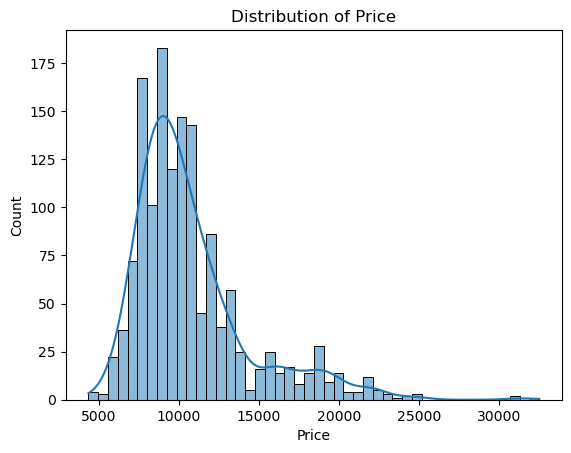

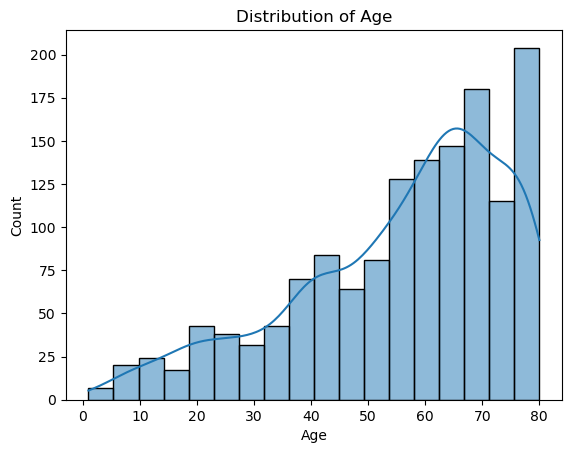

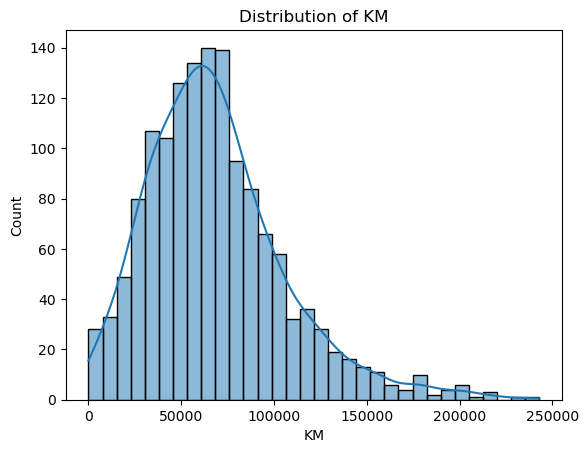

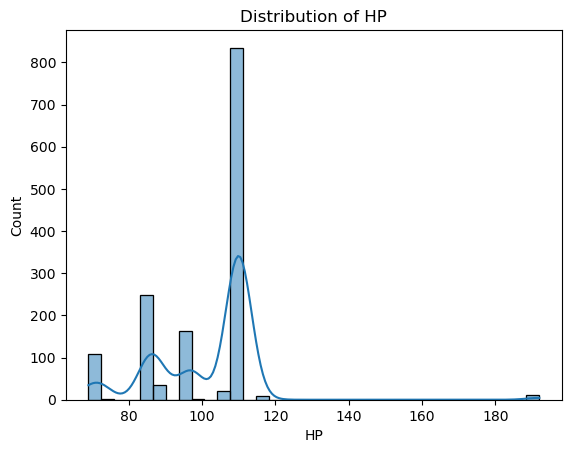

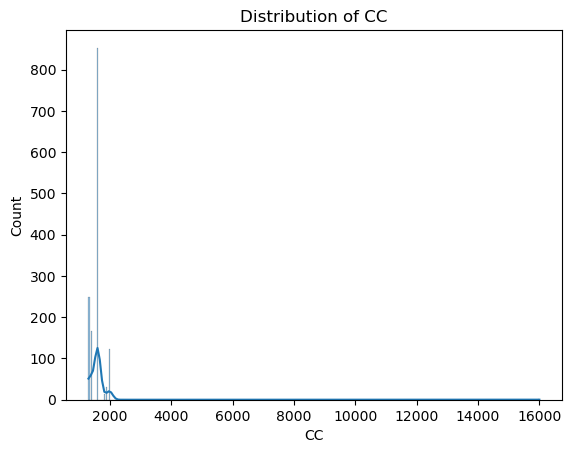

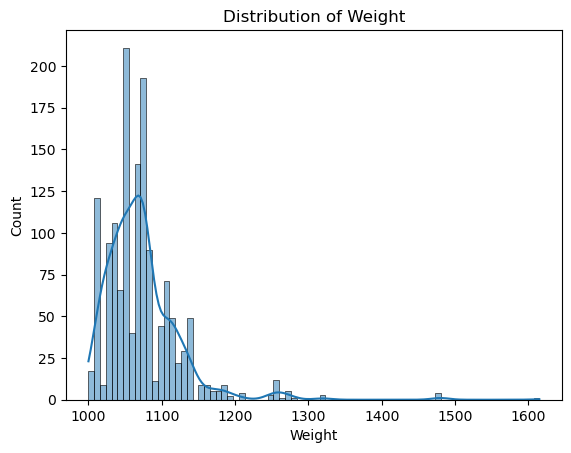

In [9]:
# Distribution plots
for col in ['Price', 'Age', 'KM', 'HP', 'CC', 'Weight']:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

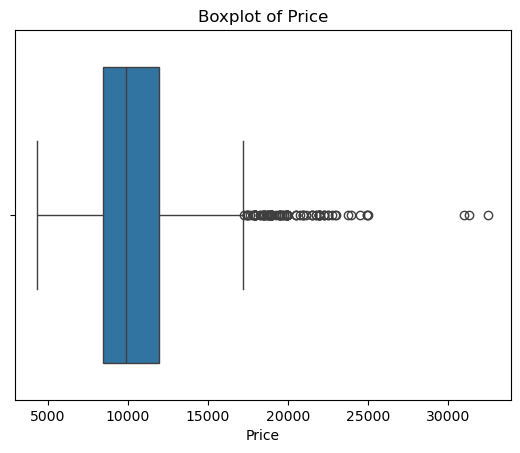

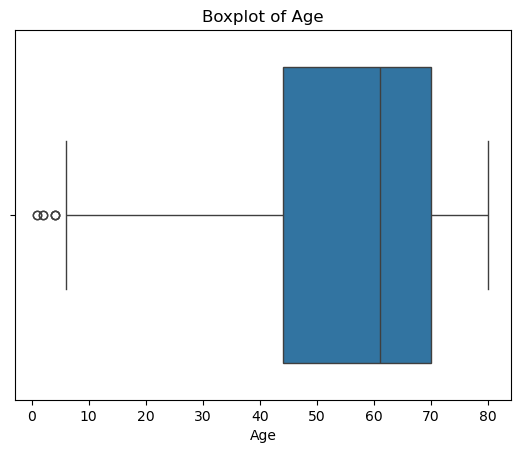

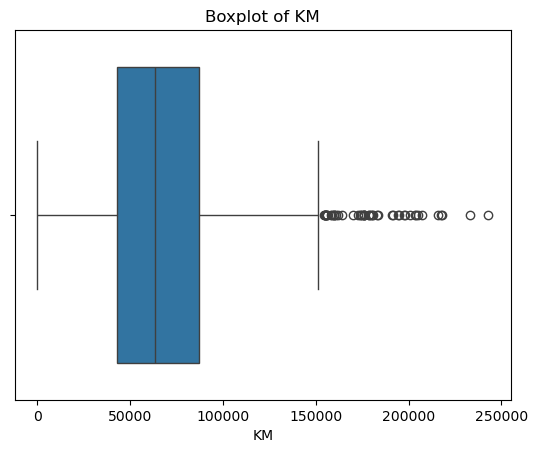

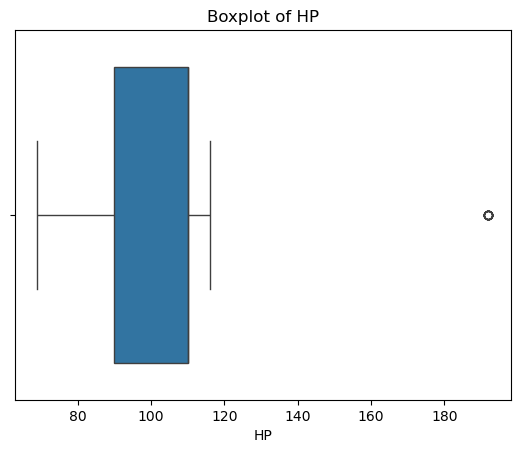

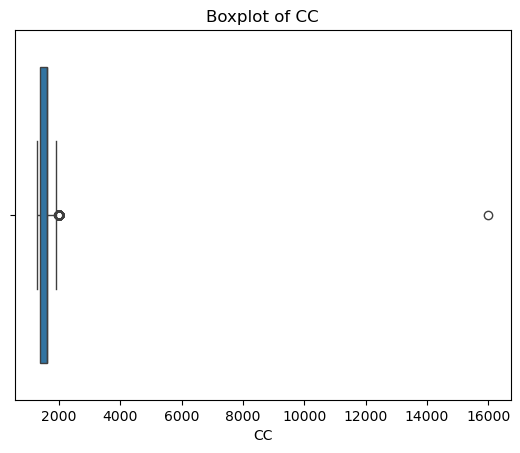

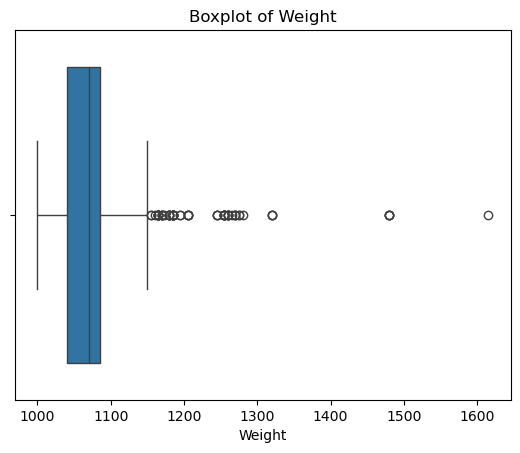

In [10]:
# Boxplots to detect outliers
for col in ['Price', 'Age', 'KM', 'HP', 'CC', 'Weight']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

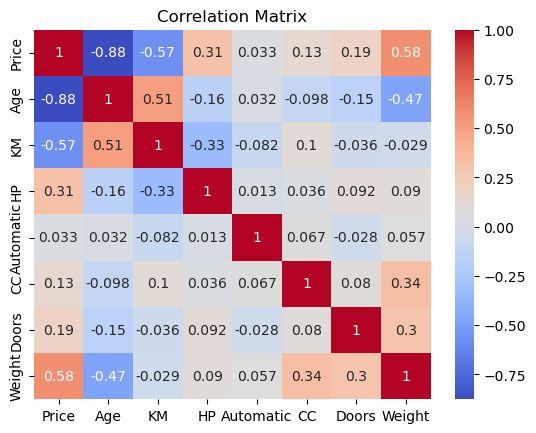

In [11]:
# Correlation heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [12]:
# One-hot encoding for categorical variable
df_encoded = pd.get_dummies(df, columns=['FuelType'], drop_first=True)
df_encoded

,Price,Age,KM,HP,Automatic,CC,Doors,Weight,FuelType_Diesel,FuelType_Petrol
0,13500,23,46986,90,0,2000,3,1165,True,False
1,13750,23,72937,90,0,2000,3,1165,True,False
2,13950,24,41711,90,0,2000,3,1165,True,False
3,14950,26,48000,90,0,2000,3,1165,True,False
4,13750,30,38500,90,0,2000,3,1170,True,False
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,1025,False,True
1432,10845,72,19000,86,0,1300,3,1015,False,True
1433,8500,71,17016,86,0,1300,3,1015,False,True
1434,7250,70,16916,86,0,1300,3,1015,False,True


# 2. Split the Dataset

In [14]:
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Building Multiple Linear Regression Models

In [16]:
# Model 1: All features
model1 = LinearRegression()
model1.fit(X_train, y_train)


LinearRegression()

In [17]:
# Model 2: Drop 'CC'
X2 = X.drop(columns=['CC'])
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)
model2 = LinearRegression()
model2.fit(X2_train, y2_train)


LinearRegression()

In [18]:
# Model 3: Top 4 features
X3 = X[['Age', 'KM', 'HP', 'Weight']]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, random_state=42)
model3 = LinearRegression()
model3.fit(X3_train, y3_train)


LinearRegression()

# 4. Evaluate the Models

In [24]:
def evaluate_model(model, X_test, y_test, label):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{label} -> MSE: {mse:.2f}, R²: {r2:.4f}")
evaluate_model(model1, X_test, y_test, "Model 1: All features")
evaluate_model(model2, X2_test, y2_test, "Model 2: Without CC")
evaluate_model(model3, X3_test, y3_test, "Model 3: Top 4 features")


Model 1: All features -> MSE: 2224306.04, R²: 0.8333
Model 2: Without CC -> MSE: 2225232.37, R²: 0.8332
Model 3: Top 4 features -> MSE: 1993321.01, R²: 0.8506


# 5. Lasso and Ridge Regression

In [27]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
evaluate_model(ridge, X_test, y_test, "Ridge Regression")
evaluate_model(lasso, X_test, y_test, "Lasso Regression")

Ridge Regression -> MSE: 2220831.92, R²: 0.8336
Lasso Regression -> MSE: 2224002.71, R²: 0.8333
